### Ordinary Linear Regresion (OLR)

#### Example 1
Inspired from: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.c_.html

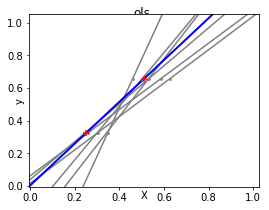

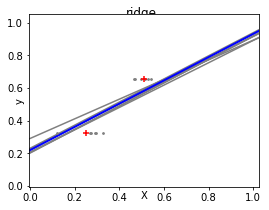

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X_train = np.c_[.5, 1].T 
# _c :  slice objects to concatenation along the second axis.
# example: 
#np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
#array([[1, 2, 3, 0, 0, 4, 5, 6]])

y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

# The dict() constructor creates a dictionary in Python

#A dictionary in Python is a collection of unordered values accessed by key rather than by 
#index. The keys have to be hashable: integers, floating point numbers, strings, 
#tuples, and frozensets are hashable, while lists, dictionaries, and sets other than 
#frozensets are not.

fignum = 1
for name, clf in classifiers.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.title(name)
    ax = plt.axes([.12, .12, .8, .8])

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='.5')
        ax.scatter(this_X, y_train, s=3, c='.5', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='r', marker='+', zorder=10)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_xlim(0, 2)
    fignum += 1

plt.show()

#### Example 2
Inspired from : http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py

In [10]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target


In [14]:
print( boston.DESCR )

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

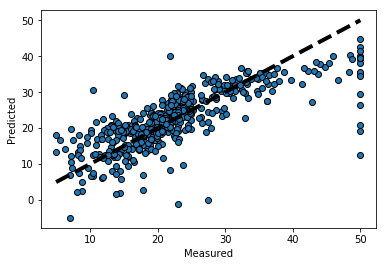

In [13]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Example 3
Inspired from : http://www.science.smith.edu/dftwiki/images/c/c7/SKLearnLinearRegression_BostonData.pdf

In [80]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()

#Print in terminal with colors 
#source : https://stackoverflow.com/questions/287871/print-in-terminal-with-colors

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'    
    
print(bcolors.OKBLUE + "Type of boston =" + bcolors.ENDC, type(boston))
print(bcolors.OKBLUE + "Data keys ="+ bcolors.ENDC, boston.keys())
print( bcolors.OKBLUE +"Data shape =" + bcolors.ENDC, boston.data.shape)
print(bcolors.OKBLUE + "Feature names =" + bcolors.ENDC, boston.feature_names)
print(bcolors.OKBLUE +"Data description =" + bcolors.ENDC, boston.DESCR)
print(bcolors.OKBLUE +"Target =" + bcolors.ENDC, "," .join(str(k) for k in boston.target[0:5]),"...","," .join(str(k) for k in boston.target[-5:]))
bostonDF = pd.DataFrame(boston.data)
bostonDF.columns = boston.feature_names
bostonDF.head()
bostonDF['PRICE'] = boston.target
bostonDF.head()

Type of boston = <class 'sklearn.utils.Bunch'>
Data keys = dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Data shape = (506, 13)
Feature names = ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Data description = Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [108]:
from sklearn.linear_model import LinearRegression
X = bostonDF.drop('PRICE',axis=1)
y = bostonDF['PRICE']
lm = LinearRegression()
lm.fit(X,y)
print("Estimated interset coeficients =",lm.intercept_)
print("number of coeficients =", len(lm.coef_))
print("Coeficients =", lm.coef_)

# zip had change in python 3, so I changed zip(X.columns,lm.coef_) for list(zip(X.columns,lm.coef_))
pd.DataFrame(list(zip(X.columns,lm.coef_)),columns=['Features','Estimated Coeff'])

Estimated interset coeficients = 36.4911032804
number of coeficients = 13
Coeficients = [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


,Features,Estimated Coeff
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


#### Generate a plot of price vs RM (average # of rooms per dwelling)

Text(0.5,1,'Price vs # Rooms')

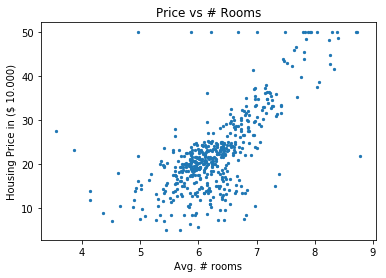

In [116]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(bostonDF.RM,bostonDF.PRICE, s=5)
plt.xlabel("Avg. # rooms")
plt.ylabel("Housing Price in ($ 10.000)")
plt.title("Price vs # Rooms")

In [117]:
lm.predict(X)[0:10]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,
        27.94288232,  25.25940048,  23.00433994,  19.5347558 ,
        11.51696539,  18.91981483])